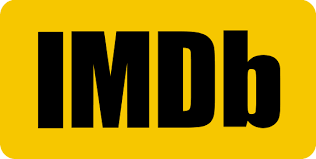

# IMDB - Movie Database Analysis

IMDB movie database analysis involves the exploration and interpretation of data from the IMDB website, which is one of the largest and most popular online databases of information related to films. The analysis includes a wide range of topics, such as trends in movie genres, box office success, representation of Audience Sentiments and much more. The analysis of IMDB data can provide valuable insights into the world of film and entertainment, and can help researchers and analysts better understand the industry as a whole.
This project is done with the guidance of [Data Analysis with Python: Zero to Pandas](zerotopandas.com) which is an excellent online platfrom to learn Python for Data Analysis.


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/cyberpunk98/imdb-movie-dataset'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: cyberpunk98
Your Kaggle Key: ········


100%|██████████| 29.8k/29.8k [00:00<00:00, 19.0MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './imdb-movie-dataset'

In [6]:
import os
os.listdir(data_dir)

['Python_IMDB_Capstone.csv']

Let us save and upload our work to Jovian before continuing.

In [162]:
project_name = "imdb movie database analysis" # change this (use lowercase letters and hyphens only)

In [163]:
!pip install jovian --upgrade -q

In [164]:
import jovian

In [165]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "riyazuddin749290000/imdb-movie-database-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis


'https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis'

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv(data_dir + "/Python_IMDB_Capstone.csv")

In [168]:
df

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
0,1,Guardians of the Galaxy,Action,James Gunn,2014,121,8.1,757074,333.13
1,2,Prometheus,Adventure,Ridley Scott,2012,124,7.0,485820,126.46
2,3,Split,Horror,M. Night Shyamalan,2016,117,7.3,157606,138.12
3,4,Sing,Animation,Christophe Lourdelet,2016,108,7.2,60545,270.32
4,5,Suicide Squad,Action,David Ayer,2016,123,6.2,393727,325.02
...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,2015,111,6.2,27585,NaN
996,997,Hostel: Part II,Horror,Eli Roth,2007,94,5.5,73152,17.54
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,2008,98,6.2,70699,58.01
998,999,Search Party,Adventure,Scot Armstrong,2014,93,5.6,4881,NaN


In [169]:
imdb = df

In [170]:
imdb.sample(8)

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
823,824,Christine,Biography,Antonio Campos,2016,119,7.0,5855,0.30
701,702,Ted,Comedy,Seth MacFarlane,2012,106,7.0,494641,218.63
165,166,Twilight,Drama,Catherine Hardwicke,2008,122,5.2,361449,191.45
648,649,Sleeping Beauty,Drama,Julia Leigh,2011,101,5.3,27006,0.03
951,952,The Descendants,Comedy,Alexander Payne,2011,115,7.3,211348,82.62
551,552,Loving,Biography,Jeff Nichols,2016,123,7.1,17141,7.70
61,62,The Autopsy of Jane Doe,Horror,André Øvredal,2016,86,6.8,35870,NaN
177,178,Tropic Thunder,Action,Ben Stiller,2008,107,7.0,321442,110.42


In [171]:
df.shape

(1000, 9)

In [172]:
df.size

9000

In [173]:
df.describe()

,ID,Year,Runtime_minutes,Rating,Votes,Revenue_millions
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Title             1000 non-null   object 
 2   Genre             1000 non-null   object 
 3   Director          1000 non-null   object 
 4   Year              1000 non-null   int64  
 5   Runtime_minutes   1000 non-null   int64  
 6   Rating            1000 non-null   float64
 7   Votes             1000 non-null   int64  
 8   Revenue_millions  872 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


In [175]:
df["ID"].astype("uint16")

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: ID, Length: 1000, dtype: uint16

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Title             1000 non-null   object 
 2   Genre             1000 non-null   object 
 3   Director          1000 non-null   object 
 4   Year              1000 non-null   int64  
 5   Runtime_minutes   1000 non-null   int64  
 6   Rating            1000 non-null   float64
 7   Votes             1000 non-null   int64  
 8   Revenue_millions  872 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


In [177]:
df.tail()

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
995,996,Secret in Their Eyes,Crime,Billy Ray,2015,111,6.2,27585,NaN
996,997,Hostel: Part II,Horror,Eli Roth,2007,94,5.5,73152,17.54
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,2008,98,6.2,70699,58.01
998,999,Search Party,Adventure,Scot Armstrong,2014,93,5.6,4881,NaN
999,1000,Nine Lives,Comedy,Barry Sonnenfeld,2016,87,5.3,12435,19.64


In [178]:
df.isna().sum()

ID                    0
Title                 0
Genre                 0
Director              0
Year                  0
Runtime_minutes       0
Rating                0
Votes                 0
Revenue_millions    128
dtype: int64

In [179]:
df.dropna(how = "any" ) 

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
0,1,Guardians of the Galaxy,Action,James Gunn,2014,121,8.1,757074,333.13
1,2,Prometheus,Adventure,Ridley Scott,2012,124,7.0,485820,126.46
2,3,Split,Horror,M. Night Shyamalan,2016,117,7.3,157606,138.12
3,4,Sing,Animation,Christophe Lourdelet,2016,108,7.2,60545,270.32
4,5,Suicide Squad,Action,David Ayer,2016,123,6.2,393727,325.02
...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,Action,Paul W.S. Anderson,2010,97,5.9,140900,60.13
994,995,Project X,Comedy,Nima Nourizadeh,2012,88,6.7,164088,54.72
996,997,Hostel: Part II,Horror,Eli Roth,2007,94,5.5,73152,17.54
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,2008,98,6.2,70699,58.01


In [180]:
df["Revenue_millions"] = df["Revenue_millions"].fillna(df["Revenue_millions"].mean())

In [181]:
df.isna().sum()

ID                  0
Title               0
Genre               0
Director            0
Year                0
Runtime_minutes     0
Rating              0
Votes               0
Revenue_millions    0
dtype: int64

In [182]:
df["Genre"].value_counts()

Action       293
Drama        195
Comedy       175
Adventure     75
Crime         71
Biography     64
Animation     49
Horror        46
Mystery       13
Thriller      10
Fantasy        4
Sci-Fi         3
Romance        2
Name: Genre, dtype: int64

In [183]:
df.dtypes

ID                    int64
Title                object
Genre                object
Director             object
Year                  int64
Runtime_minutes       int64
Rating              float64
Votes                 int64
Revenue_millions    float64
dtype: object

In [184]:
df["Rating"] = df["Rating"].astype ("uint")

In [185]:
df.loc[[2 ,5]]

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
2,3,Split,Horror,M. Night Shyamalan,2016,117,7,157606,138.12
5,6,The Great Wall,Action,Yimou Zhang,2016,103,6,56036,45.13


In [186]:
df.loc[:4 ,("Genre" , "Rating")]

,Genre,Rating
0,Action,8
1,Adventure,7
2,Horror,7
3,Animation,7
4,Action,6


In [187]:
df.dtypes

ID                    int64
Title                object
Genre                object
Director             object
Year                  int64
Runtime_minutes       int64
Rating               uint64
Votes                 int64
Revenue_millions    float64
dtype: object

In [188]:
df.drop(index = 3)

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
0,1,Guardians of the Galaxy,Action,James Gunn,2014,121,8,757074,333.130000
1,2,Prometheus,Adventure,Ridley Scott,2012,124,7,485820,126.460000
2,3,Split,Horror,M. Night Shyamalan,2016,117,7,157606,138.120000
4,5,Suicide Squad,Action,David Ayer,2016,123,6,393727,325.020000
5,6,The Great Wall,Action,Yimou Zhang,2016,103,6,56036,45.130000
...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,2015,111,6,27585,82.956376
996,997,Hostel: Part II,Horror,Eli Roth,2007,94,5,73152,17.540000
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,2008,98,6,70699,58.010000
998,999,Search Party,Adventure,Scot Armstrong,2014,93,5,4881,82.956376


In [189]:
df.drop("Year" , axis =1) ## df.drop(index = 3)

,ID,Title,Genre,Director,Runtime_minutes,Rating,Votes,Revenue_millions
0,1,Guardians of the Galaxy,Action,James Gunn,121,8,757074,333.130000
1,2,Prometheus,Adventure,Ridley Scott,124,7,485820,126.460000
2,3,Split,Horror,M. Night Shyamalan,117,7,157606,138.120000
3,4,Sing,Animation,Christophe Lourdelet,108,7,60545,270.320000
4,5,Suicide Squad,Action,David Ayer,123,6,393727,325.020000
...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,111,6,27585,82.956376
996,997,Hostel: Part II,Horror,Eli Roth,94,5,73152,17.540000
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,98,6,70699,58.010000
998,999,Search Party,Adventure,Scot Armstrong,93,5,4881,82.956376


In [190]:
df.rename(columns = {"ID" : "Movie_ID"}) 

,Movie_ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
0,1,Guardians of the Galaxy,Action,James Gunn,2014,121,8,757074,333.130000
1,2,Prometheus,Adventure,Ridley Scott,2012,124,7,485820,126.460000
2,3,Split,Horror,M. Night Shyamalan,2016,117,7,157606,138.120000
3,4,Sing,Animation,Christophe Lourdelet,2016,108,7,60545,270.320000
4,5,Suicide Squad,Action,David Ayer,2016,123,6,393727,325.020000
...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,2015,111,6,27585,82.956376
996,997,Hostel: Part II,Horror,Eli Roth,2007,94,5,73152,17.540000
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,2008,98,6,70699,58.010000
998,999,Search Party,Adventure,Scot Armstrong,2014,93,5,4881,82.956376


In [191]:
import jovian

In [192]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "riyazuddin749290000/imdb-movie-database-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis


'https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis'

## Exploratory Analysis and Visualization

Exploratory data analysis is a way to better understand data. The numerical data will be visualized in graphs.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [193]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Distributions of numeric columns using Line Plot:

Text(0.5, 1.0, 'Line plot of Rating')

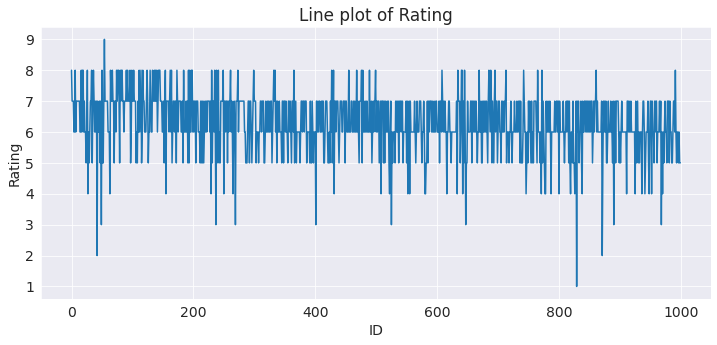

In [194]:
plt.figure(figsize=(12, 5))
df["Rating"].plot()
plt.xlabel("ID")
plt.ylabel("Rating")
plt.title("Line plot of Rating")


### Inference:

From this plot we can see the more spread of rating between 6 to 9 
which tells us the most of the movies are rated between `6 to 9`.

In [195]:
df.columns

Index(['ID', 'Title', 'Genre', 'Director', 'Year', 'Runtime_minutes', 'Rating',
       'Votes', 'Revenue_millions'],
      dtype='object')

Text(0.5, 1.0, "Rating of first 100 ID's")

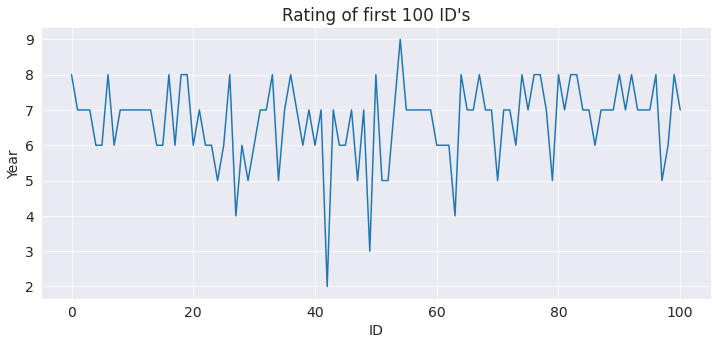

In [196]:
x = df.loc[:100 ,"Rating"]
plt.figure(figsize=(12, 5))
x.plot()
plt.xlabel("ID")
plt.ylabel("Year")
plt.title("Rating of first 100 ID's")

### Inference:

This Lineplot is a sample visualization of first 100 ID's. From this visual we can see the more spread of rating between 6 to 9 
which tells us the most of the movies are rated between `6 to 9`.

### Distributions of numeric columns using histograms:

Text(0.5, 1.0, "Histogram of Rating with Id's")

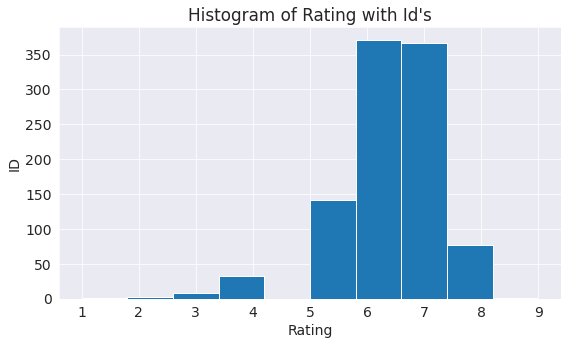

In [197]:
plt.hist([df["Rating"]] , bins = 10)
plt.ylabel("ID")
plt.xlabel("Rating")
plt.title("Histogram of Rating with Id's")

It is clear from the Histogram that the Highest Average Rating is around 6.5

In [198]:
import jovian

In [199]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "riyazuddin749290000/imdb-movie-database-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis


'https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis'

## Asking and Answering Questions

Lets find out some more about Formula One. Below five questions regarding Formula One will be answerred.


## Q1 Which year has the lowest number of Votes?

<Figure size 1080x720 with 0 Axes>

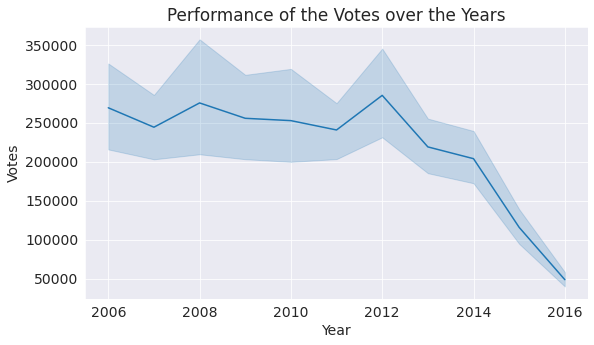

<Figure size 1080x720 with 0 Axes>

In [200]:
plt.title("Performance of the Votes over the Years")
viz = sns.lineplot( data = imdb,
                   x = "Year" ,
                   y = "Votes")
plt.figure(figsize = (15,10))


### Inference:

**From this LinePlot it is clearly evident that the Votes are hovering within the range of `200000 to 300000` from 2006 to 2012 but suddenly there is a sharp drop in the votes from 2013 and the Year 2016 has the lowest number of Votes**



## Q2 On which range the maximum of Revenue and Ratings lies upon?

In [202]:
pairplot = imdb[["Rating" , "Revenue_millions" ,"Genre"]]

In [214]:
pairplot

,Rating,Revenue_millions,Genre
0,8,333.130000,Action
1,7,126.460000,Adventure
2,7,138.120000,Horror
3,7,270.320000,Animation
4,6,325.020000,Action
...,...,...,...
995,6,82.956376,Crime
996,5,17.540000,Horror
997,6,58.010000,Drama
998,5,82.956376,Adventure


Text(0.5, 0.98, 'My Pairplot')

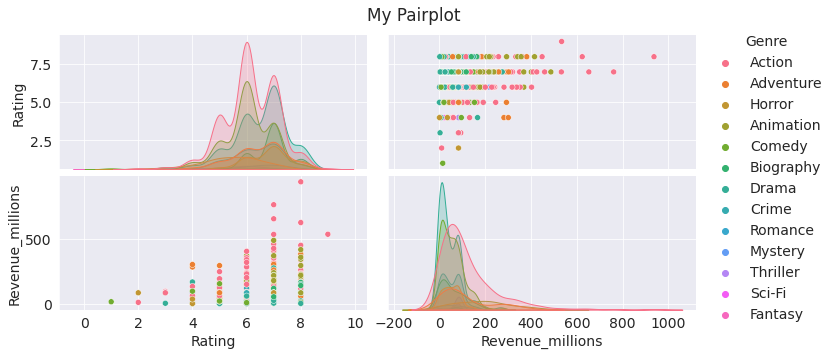

In [215]:
viz = sns.pairplot( pairplot, hue = "Genre" , aspect = 2 )
viz.fig.subplots_adjust(top = .9)
viz.fig.suptitle("My Pairplot")

### Inference:
**This pairplot shows an overall idea of the relation between Rating and Revenue with different plots.
Its is inferred that the cluster of ratings is between `4.5 to 8.5` and also the revenue is spread 
between 0 to 400 milions 
However there are few outliers present in the data.**


## Q3 What are the Top 3 Profitable year ?

Text(0.5, 1.0, 'Revenue_millions for each year')

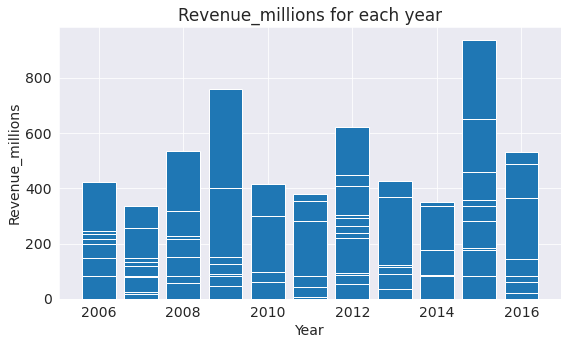

In [216]:
plt.bar(df["Year"] , df["Revenue_millions"] )
plt.xlabel("Year")
plt.ylabel("Revenue_millions")
plt.title("Revenue_millions for each year")

### Inference:
**This Barplot gives a visual that displays that the Year `2015` has the highest Revenue followed by the Year `2007 & 2012`.**


## Q4: Does the Revenue of the movie is directly proportional to the Ratings?

<Figure size 1080x720 with 0 Axes>

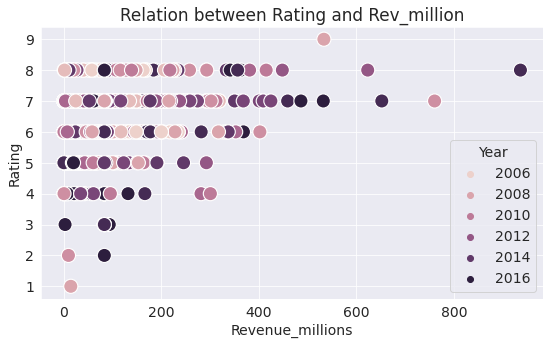

<Figure size 1080x720 with 0 Axes>

In [217]:
plt.title("Relation between Rating and Rev_million")
plot = sns.scatterplot(x = df["Revenue_millions"],
                       y = df["Rating"],
                hue = df["Year"],s = 200,
                legend = True
               )

plt.figure(figsize = (15,10))

### Inference:

**This scatter plot establish the relationship between Rating and Revenue where the Rating is gradually spread over 6 to 9 for the movies which generated Revenue of 400 million and below which shows that an average rated movie has the potential to generates a revenue upto 400 millions. However there are few movies which outperform the average collection by collecting more than 800 millions with a above average rating.**

## Q5: Which is the highest rated genre?

[Text(0, 0, 'Action'),
 Text(1, 0, 'Adventure'),
 Text(2, 0, 'Horror'),
 Text(3, 0, 'Animation'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Biography'),
 Text(6, 0, 'Drama'),
 Text(7, 0, 'Crime'),
 Text(8, 0, 'Romance'),
 Text(9, 0, 'Mystery'),
 Text(10, 0, 'Thriller'),
 Text(11, 0, 'Sci-Fi'),
 Text(12, 0, 'Fantasy')]

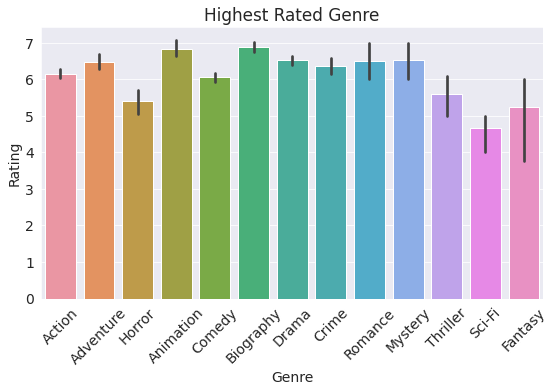

In [218]:
plt.title("Highest Rated Genre")
output = sns.barplot(x='Genre', y='Rating' ,data=df);

output.set_xticklabels(output.get_xticklabels(), rotation=45)

### Inference:

**From the visualization it is clear that the `Biography` genre has the highest rating followed by `Animation` and `Drama` 
However the Average Rating lies around `6.2`**

Let us save and upload our work to Jovian before continuing.

In [219]:
import jovian

In [220]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "riyazuddin749290000/imdb-movie-database-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis


'https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis'

## Inferences and Conclusion


**IMDB (Internet Movie Database) is one of the largest online databases of information related to films, television programs, and video games. As such, the IMDB dataset is a popular choice for data analysts and researchers interested in exploring various aspects of the film industry.**

In this IMDB Data analysis project we have found lot of meaningful insights regarding the 
* Total Revenue with respect to Genres,
* Performance of Directors, 
* Audience Sentiments analysis towards a particular Genre, 
* Distribution of a variable over an axis etc.

Overall, the IMDb dataset provides a rich source of information for anyone interested in exploring the world of film and entertainment, and can be used to answer a wide range of research questions.

In [221]:
import jovian

In [222]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "riyazuddin749290000/imdb-movie-database-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis


'https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis'

## References and Future Work

#### Future Work Idea:
Sentiment analysis: Conduct sentiment analysis on movie reviews to determine the overall sentiment of audiences toward different movies using `Machine Learning and NLP` in future.

#### Reference:
Refer the below link for more details.

[Click here for the article on Sentiment Analysis](https://www.red-gate.com/simple-talk/development/data-science-development/sentiment-analysis-python/)

In [225]:
import jovian

In [226]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "riyazuddin749290000/imdb-movie-database-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis


'https://jovian.com/riyazuddin749290000/imdb-movie-database-analysis'